# 0.0. IMPORTS

In [1]:
import pandas  as pd
import seaborn as sns

from sklearn    import model_selection as ms
from sklearn    import preprocessing   as pp
from sklearn    import metrics         as m
from scikitplot import metrics         as mt
from keras      import models          as ml
from keras      import layers          as l

## 0.1. Aux Functions

In [2]:
# jupyter design
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    %config InlineBackend.figure_format = 'retina'

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [16, 8]
    plt.rcParams['font.size'] = 24

#     display(HTML('<style>.container { width:100% !important; }</style>'))
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.options.display.float_format = '{:,.4f}'.format
#     pd.set_option('display.expand_frame_repr', False)
#     pd.set_option('display.max_columns', None)
#     pd.set_option('display.max_rows', None)

    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2. Reading Data

In [3]:
df_raw = pd.read_csv( "../datasets/train_users_2.csv" )

# 1.0. DATA DESCRIPTION

In [4]:
df1 = df_raw.copy()

## 1.1. Columns Descriptions

In [5]:
df1.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

- **id:** user id

- **date_account_created:** the date of account creation

- **timestamp_first_active:** timestamp of the first activity, note that it can be earlier than date_account_created or -date_first_booking because a user can search before signing up

- **date_first_booking: date of first booking**

- **gender**

- **age**

- **signup_method**

- **signup_flow:** the page a user came to signup up from

- **language:** international language preference

- **affiliate_channel:** what kind of paid marketing

- **affiliate_provider:** where the marketing is e.g. google, craigslist, other

- **first_affiliate_tracked:** whats the first marketing the user interacted with before the signing up

- **signup_app**

- **first_device_type**

- **first_browser**

- **country_destination:** this is the target variable you are to predict

### 1.1.1. Rename Columns

No need, they're already on snakecase.

## 1.2. Data Dimensions

In [6]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 213451
Number of columns: 16


## 1.3. NA Check

In [7]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

### 1.3.1. NA Fulfill

In [8]:
df1 = df1.dropna()

## 1.4. Data Types

In [9]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

### 1.4.1. Change types

In [10]:
# date account created - datetime
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# timestamp first active - datetime
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format=( '%Y-%m-%d %H:%M:%S' ) )

# date first booking - datetime
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

# age - int
df1['age'] = df1['age'].astype( 'int64' )

## 1.5. Data Proportion

In [11]:
df1['country_destination'].value_counts( normalize=True )

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

We clearly have Imbalanced Data, wich will affect the models.

## 1.6. Descriptive Statistics

### 1.6.1. Numerical Attributes

### 1.6.2. Categorical Attributes

# 2.0. DATA FILTERING

In [12]:
df2 = df1.copy()

# 3.0. FEATURE ENGINEERING

In [13]:
df3 = df2.copy()

# 4.0. EXPLORATORY DATA ANALYSIS

In [14]:
df4 = df1.copy()

# 5.0. DATA PREPARATION

In [15]:
df5 = df4.drop( columns=['date_account_created','timestamp_first_active','date_first_booking'] )

df5_dummies = pd.get_dummies( df5.drop( columns=['id','country_destination'] ) )
df5 = pd.concat( [ df5[['id','country_destination']], df5_dummies ], axis=1 )

# 6.0. FEATURE SELECTION

In [16]:
df6 = df5.copy()

# 7.0. MACHINE LEARNING

In [17]:
X = df6.drop( columns=['id','country_destination'] )
Y = df6['country_destination'].copy()

x_train, x_val, y_train, y_val = ms.train_test_split( X, Y, test_size=0.2, random_state=42 )

## 7.1. Neural Network - MLP

In [18]:
# y train preparation
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [19]:
# model definition
model = ml.Sequential()
model.add( l.Dense( 128, input_dim=x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 11, activation='softmax' ) )

# model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# modelo training
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 2s 849us/step - loss: 1.3304 - accuracy: 0.7062
Epoch 2/100
1705/1705 [==============================] - 1s 836us/step - loss: 1.3064 - accuracy: 0.7059
Epoch 3/100
1705/1705 [==============================] - 1s 842us/step - loss: 1.2695 - accuracy: 0.7058
Epoch 4/100
1705/1705 [==============================] - 1s 849us/step - loss: 1.2299 - accuracy: 0.7066
Epoch 5/100
1705/1705 [==============================] - 1s 863us/step - loss: 1.2046 - accuracy: 0.7069
Epoch 6/100
1705/1705 [==============================] - 2s 890us/step - loss: 1.1815 - accuracy: 0.7071
Epoch 7/100
1705/1705 [==============================] - 1s 872us/step - loss: 1.1703 - accuracy: 0.7069
Epoch 8/100
1705/1705 [==============================] - 2s 946us/step - loss: 1.1616 - accuracy: 0.7072
Epoch 9/100
1705/1705 [==============================] - 1s 865us/step - loss: 1.1512 - accuracy: 0.7073
Epoch 10/100
1705/1705 [==============================]

1705/1705 [==============================] - 2s 910us/step - loss: 1.1066 - accuracy: 0.7099
Epoch 80/100
1705/1705 [==============================] - 2s 971us/step - loss: 1.1066 - accuracy: 0.7098
Epoch 81/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1058 - accuracy: 0.7098
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1059 - accuracy: 0.7100
Epoch 83/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1062 - accuracy: 0.7101
Epoch 84/100
1705/1705 [==============================] - 3s 1ms/step - loss: 1.1059 - accuracy: 0.7099
Epoch 85/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1052 - accuracy: 0.7101
Epoch 86/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1050 - accuracy: 0.7102
Epoch 87/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1045 - accuracy: 0.7101
Epoch 88/100
1705/1705 [==============================] - 2s 1ms/step - l

In [20]:
# prediction
pred_nn = model.predict( x_val )

# invert_prediction
yhat_nn = ohe.inverse_transform( pred_nn )

# prediction prepare
y_val_nn = y_val.to_numpy()
yhat_nn = yhat_nn.reshape( 1, -1 )[0]

### 7.1.1. Performance

In [21]:
# Accuracy 
accuracy_nn = m.accuracy_score( y_val_nn, yhat_nn )
print( 'Accuracy is {}'.format( accuracy_nn ) )

Accuracy is 0.7103043637697103


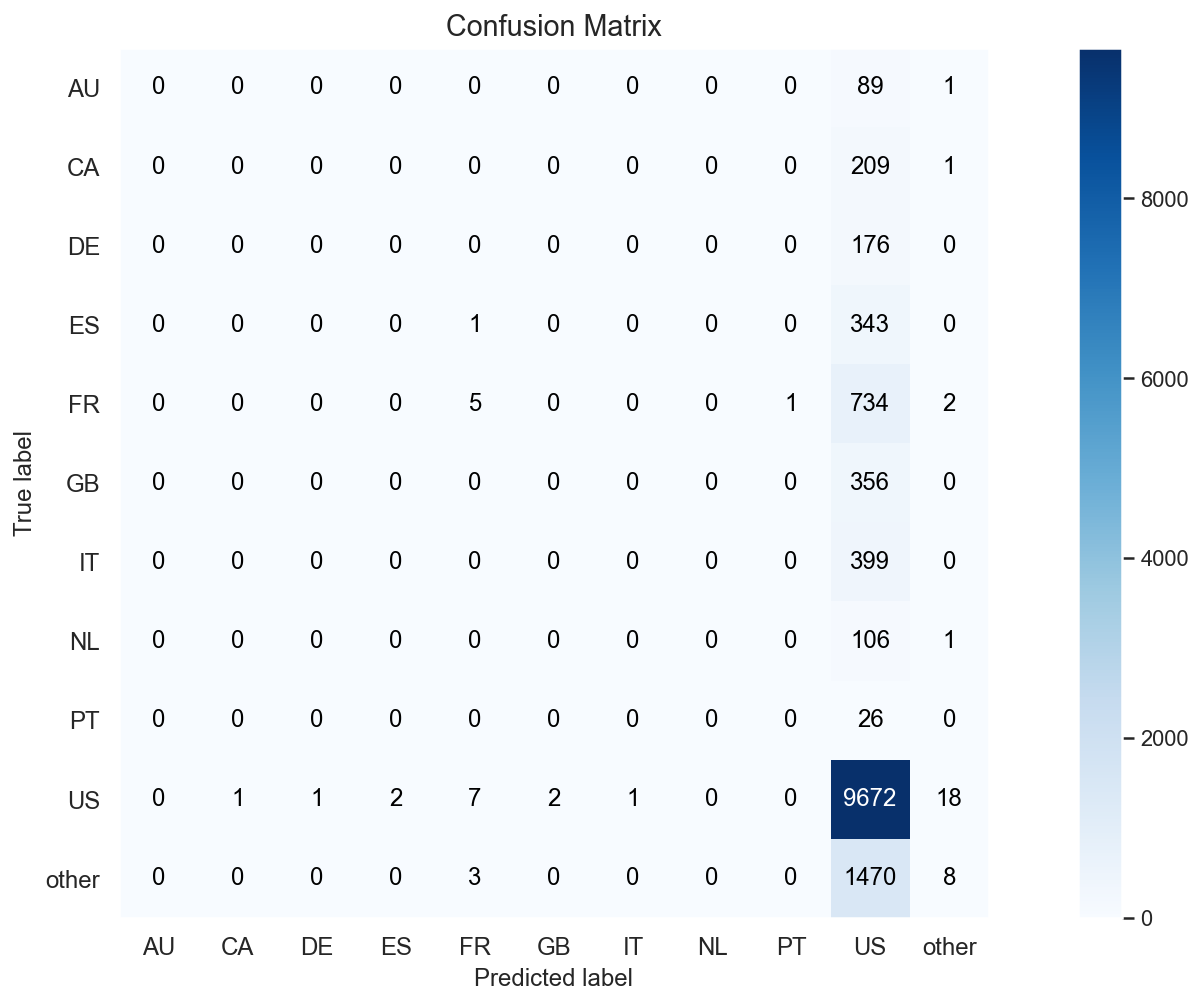

In [22]:
# Confusion Matrix
mt.plot_confusion_matrix( y_val_nn, yhat_nn, normalize=False );

# 8.0. HYPERPARAMETER FINE TUNING

# 9.0. BUSINESS RESULTS

# 10.0. DEPLOY